The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [29]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# load the dataset
nobel = pd.read_csv('./data/nobel.csv')

# Print the first few rows
nobel.head()



,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


#### What is the most commonly awarded gender and birth country?


Most commonly awarded gender: Male


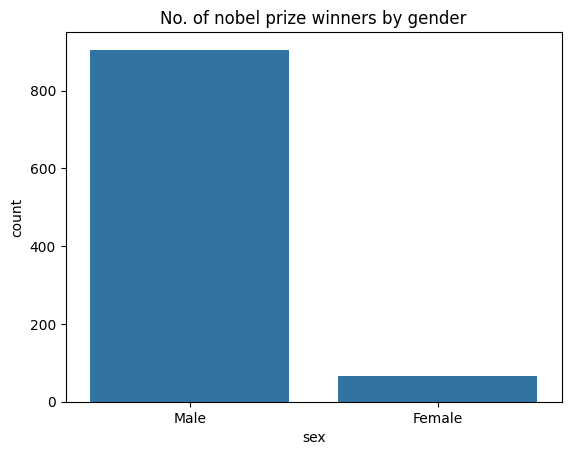

In [43]:
# Get the number of nobel prize winners per gender
gender_counts = nobel['sex'].value_counts()

# Store the gender with the most nobel prize winners
top_gender = gender_counts.idxmax()

# Display the result
print("Most commonly awarded gender: " + top_gender)

# Count plot of the nobel prize winners by gender
sns.countplot(x="sex",data=nobel)
plt.title("No. of nobel prize winners by gender")
plt.show()


Most commonly awarded birth country: United States of America


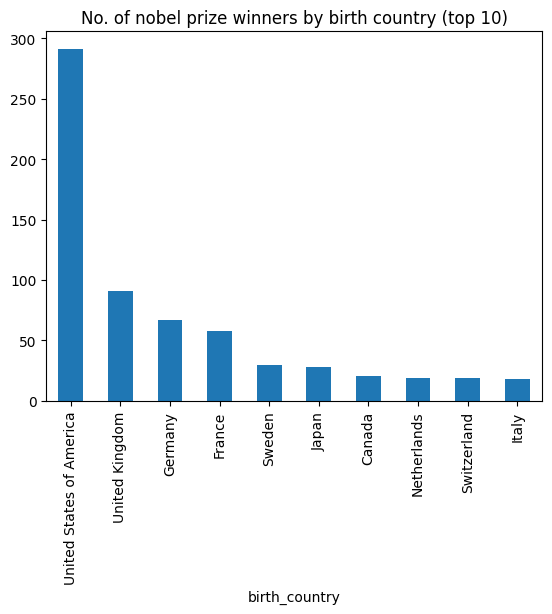

In [46]:
# Get the number of nobel prize winners per birth country
country_counts = nobel['birth_country'].value_counts().head(10)

# Store the birth country with the most nobel prize winners
top_country = country_counts.idxmax()

# Bar plot of the top 10 birth countries with the most nobel prize winners
print("Most commonly awarded birth country: "+ top_country)
country_counts.plot(kind="bar")
plt.title("No. of nobel prize winners by birth country (top 10)")
plt.show()

#### Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?

In [86]:
# Create a decade column to store the decade where the year belongs
nobel["decade"] = nobel["year"] // 10 * 10

# Subset the nobel prize winners born in the USA
usa_nobels = nobel[nobel["birth_country"] == "United States of America"]

# Get the total number of us-born nobel prize winners per decade
usa_nobels_per_decade = usa_nobels.groupby("decade").agg({"laureate_id": "count"})

# Get the total number of nobel prize winners per decade
total_nobels_per_decade = nobel.groupby("decade").agg({"laureate_id":"count"})

# Create a dataframe to store the no. of nobel winners in the usa and total
ratios = pd.DataFrame({
    "usa_nobel_count": usa_nobels_per_decade["laureate_id"],
    "total_nobel_count": total_nobels_per_decade["laureate_id"]
})

# Compute the ratio
ratios["ratio"] = ratios["usa_nobel_count"] / (ratios["total_nobel_count"] - ratios["usa_nobel_count"])

# Get the value of the decade with the highest ratio
max_decade_usa = ratios["ratio"].idxmax()

print("Decade with the highest ratio of US-born winners: " + str(max_decade_usa))
print("Ratio: " + str(ratios["ratio"].max()))
ratios


Decade with the highest ratio of US-born winners: 2000
Ratio: 0.7323943661971831


,usa_nobel_count,total_nobel_count,ratio
decade,,,
1900,1,57,0.017857
1910,3,40,0.081081
1920,4,54,0.080000
1930,14,56,0.333333
1940,13,43,0.433333
1950,21,72,0.411765
1960,21,79,0.362069
1970,33,104,0.464789
1980,31,97,0.469697


#### Which decade and Nobel Prize category combination had the highest proportion of female laureates?

In [133]:
# Get all rows with female laureates
female_laureates = nobel[nobel["sex"] == "Female"]

# Count all female laureates per decade + category combination
females_per_decade_categ= female_laureates.groupby(["decade","category"]).agg({"laureate_id": "count"})

# Count all laureates per decade + category combination
total_per_decade_categ = nobel.groupby(["decade","category"]).agg({"laureate_id": "count"})

# Compute the proportion
females_per_decade_categ["proportion"] = females_per_decade_categ["laureate_id"] / total_per_decade_categ["laureate_id"]

# Retrieve the decade + category with the highest female proportion
max_female = females_per_decade_categ.loc[[females_per_decade_categ["proportion"].idxmax()]]

# Store the decade and category in a dictionary
max_female_dict = {max_female.index[0][0]: max_female.index[0][1]}

# Extract the key-value pair for display
key, value = list(max_female_dict.items())[0]

print("Decade and Category Combination with highest proportion of female laureates: " + str(key) + " and " + value)




Decade and Category Combination with highest proportion of female laureates: 2020 and Literature


#### Who was the first woman to receive a Nobel Prize, and in what category?

In [ ]:
# Get the first row among the female laureates dataframe
first_woman = female_laureates.iloc[[0]]

# Store the name and category from the extracted row
first_woman_name = first_woman["full_name"].iloc[0]
first_woman_category = first_woman["category"].iloc[0]

# Display the information
print("Name of first female laureate: " + first_woman_name)
print("Category: " + first_woman_category)

Name of first female laureate: Marie Curie, née Sklodowska
Category: Physics


#### Which individuals or organizations have won more than one Nobel Prize throughout the years?

In [132]:
# Initialize the list
repeat_list = []

# Count the instances of each individual
individuals_counts= nobel["full_name"].value_counts()

# Filter the data based on individuals that had occurences > 1
repeating_individuals = individuals_counts[individuals_counts > 1]

# Add the filtered data to the list
repeat_list.extend(repeating_individuals.index.tolist())

repeat_list






['Comité international de la Croix Rouge (International Committee of the Red Cross)',
 'Frederick Sanger',
 'Marie Curie, née Sklodowska',
 'Office of the United Nations High Commissioner for Refugees (UNHCR)',
 'John Bardeen',
 'Linus Carl Pauling']